In [63]:
from __future__ import print_function # print('me') instead of print 'me'
from __future__ import division  # 1/2 == 0.5, not 0

import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
%matplotlib inline

# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
#plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.interpolation'] = 'bilinear'

In [89]:
import nibabel as nib
t1_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()
t2_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t2_tal_nlin_asym_09a.nii')
t2_data = t2_img.get_fdata()

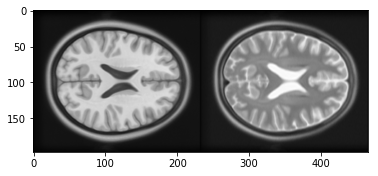

In [90]:
# Show the images by stacking them left-right with hstack
t1_slice = t1_data[:, :, 94]
t2_slice = t2_data[:, :, 94]
plt.imshow(np.hstack((t1_slice, t2_slice)))

In [103]:
print(t1_slice.shape)

help(t1_img)

(197, 233)
Help on Nifti1Image in module nibabel.nifti1 object:

class Nifti1Image(Nifti1Pair)
 |  Class for single file NIfTI1 format image
 |  
 |  Method resolution order:
 |      Nifti1Image
 |      Nifti1Pair
 |      nibabel.analyze.AnalyzeImage
 |      nibabel.spatialimages.SpatialImage
 |      nibabel.dataobj_images.DataobjImage
 |      nibabel.filebasedimages.FileBasedImage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  update_header(self)
 |      Harmonize header with image data and affine
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  files_types = (('image', '.nii'),)
 |  
 |  header_class = <class 'nibabel.nifti1.Nifti1Header'>
 |      Class for NIfTI1 header
 |      
 |      The NIfTI1 header has many more coded fields than the simpler Analyze
 |      variants.  NIfTI1 headers also have extensions.
 |      
 |      Nifti allows the header to be a separate file, as part of

In [92]:
print(t2_img.get_sform())
print(t2_img.get_qform())

[[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Text(0.5, 1.0, 'T2 slice histogram')

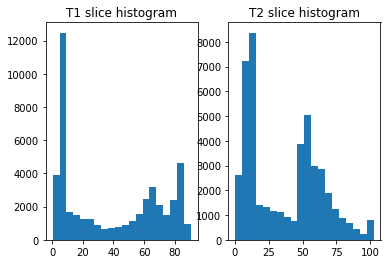

In [93]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(t1_slice.ravel(), bins=20)
axes[0].set_title('T1 slice histogram')
axes[1].hist(t2_slice.ravel(), bins=20)
axes[1].set_title('T2 slice histogram')

0.7870798551095306

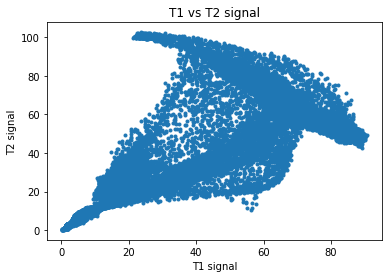

In [94]:
plt.plot(t1_slice.ravel(), t2_slice.ravel(), '.')
plt.xlabel('T1 signal')
plt.ylabel('T2 signal')
plt.title('T1 vs T2 signal')
np.corrcoef(t1_slice.ravel(), t2_slice.ravel())[0, 1]

Text(0.5, 1.0, 'T2 slice')

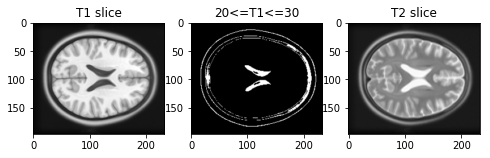

In [106]:
# Array that is True if T1 signal >= 20, <= 30, False otherwise
t1_20_30 = (t1_slice >= 20) & (t1_slice <= 30)
# Show T1 slice, mask for T1 between 20 and 30, T2 slice
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
axes[0].imshow(t1_slice)
axes[0].set_title('T1 slice')
axes[1].imshow(t1_20_30)
axes[1].set_title('20<=T1<=30')
axes[2].imshow(t2_slice)
axes[2].set_title('T2 slice')

Text(0, 0.5, 'T2 signal bin')

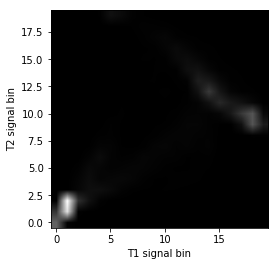

In [96]:
hist_2d, x_edges, y_edges = np.histogram2d(
     t1_slice.ravel(),
     t2_slice.ravel(),
     bins=20)
# Plot as image, arranging axes as for scatterplot
# We transpose to put the T1 bins on the horizontal axis
# and use 'lower' to put 0, 0 at the bottom of the plot
plt.imshow(hist_2d.T, origin='lower')
plt.xlabel('T1 signal bin')
plt.ylabel('T2 signal bin')

Text(0, 0.5, 'T2 signal bin')

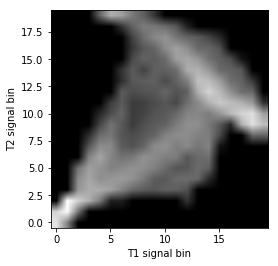

In [97]:
# Show log histogram, avoiding divide by 0
hist_2d_log = np.zeros(hist_2d.shape)
non_zeros = hist_2d != 0
hist_2d_log[non_zeros] = np.log(hist_2d[non_zeros])
plt.imshow(hist_2d_log.T, origin='lower')
plt.xlabel('T1 signal bin')
plt.ylabel('T2 signal bin')

In [104]:
def mutual_information(hgram):
     """ Mutual information for joint histogram
     """
     # Convert bins counts to probability values
     pxy = hgram / float(np.sum(hgram))
     px = np.sum(pxy, axis=1) # marginal for x over y
     py = np.sum(pxy, axis=0) # marginal for y over x
     px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
     # Now we can do the calculation using the pxy, px_py 2D arrays
     nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
     return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

print(mutual_information(hist_2d))

histSame_2d, _, _ = np.histogram2d(
     t1_slice.ravel(),
     t1_slice.ravel(),
     bins=20)
print(mutual_information(histSame_2d))

1.3399511058289812
2.6061547131364478


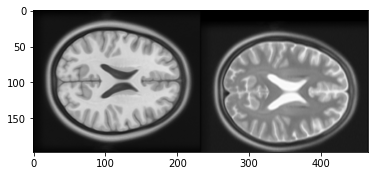

In [99]:
t2_slice_moved = np.zeros(t2_slice.shape)
t2_slice_moved[15:, :] = t2_slice[:-15, :]
plt.imshow(np.hstack((t1_slice, t2_slice_moved)))

Text(0.5, 1.0, 'T1 vs T2 signal after moving T2 image')

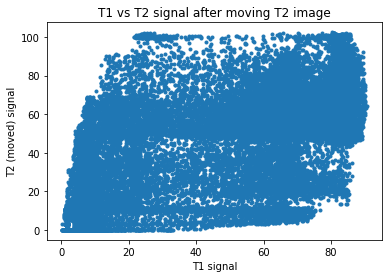

In [100]:
plt.plot(t1_slice.ravel(), t2_slice_moved.ravel(), '.')
plt.xlabel('T1 signal')
plt.ylabel('T2 (moved) signal')
plt.title('T1 vs T2 signal after moving T2 image')

Text(0, 0.5, 'T2 signal bin')

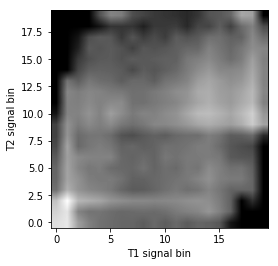

In [101]:
hist_2d_moved, x_edges, y_edges = np.histogram2d(
     t1_slice.ravel(),
     t2_slice_moved.ravel(),
     bins=20)

# Show log histogram, avoiding divide by 0
hist_2d_moved_log = np.zeros(hist_2d_moved.shape)
non_zeros = hist_2d_moved != 0
hist_2d_moved_log[non_zeros] = np.log(hist_2d_moved[non_zeros])
plt.imshow(hist_2d_moved_log.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')

In [108]:
print(mutual_information(hist_2d_moved))
print(mutual_information(hist_2d))

0.4577827377824529
1.3399511058289812
